In [55]:
#Import needed modules.
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [218]:
# 1. Use pd.read_csv to open 'attacks' dataframe.
attacks = pd.read_csv('attacks.csv', encoding = 'cp1252')

# 2. Create a copy to work with it.
attacks_cp = attacks.copy()

# 3. Display a summary of the dataframe to ensure we opened it.
attacks_cp.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [219]:
# 1. Create a variable with all the column names without starting or end whitespace.
columns_no_spaces = [x.lstrip().rstrip() for x in attacks_cp.columns]

# 2. Change database column names to the list created above.
attacks_cp.columns = columns_no_spaces

# 3. Display the name of the columns to check if worked correctly.
attacks_cp.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [220]:
# Display info about our current database.
# We get a summary of the database with 25_723 rows and 24 columns.
attacks_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [221]:
# Drop rows that have all null values.
attacks_cp.dropna( axis = 0, how = 'all', inplace = True ) 
 
# Checking for duplicate rows.
duplicates = attacks_cp[attacks_cp.duplicated()]
duplicates

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Since we have 2_392 duplicated rows full of nulls, only with case number = 0,
# lets drop them from the dataframe
attacks_cp.drop_duplicates ( inplace = True )
    
# Checking to have an empty dataset when running duplicated function.
attacks_cp[attacks_cp.duplicated()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [223]:
# Checking the difference between original dataframe, and attacks_cp
print('These dataframes also have different sizes and lengths')
print('Attacks size: ', attacks.size)
print('Attacks_cp size: ', attacks_cp.size)
print('Attacks len: ', len(attacks))
print('Attacks_cp len: ', len(attacks_cp))

These dataframes also have different sizes and lengths
Attacks size:  617352
Attacks_cp size:  151464
Attacks len:  25723
Attacks_cp len:  6311


In [271]:
# Now lets set an ID for each row, to be able to work.
attacks_cp.index = [ x for x in range ( 1, len ( attacks_cp.values) +1 ) ]
attacks_cp.index.name = 'ID'

In [311]:
# Now we have clean original database, lets go on with columns 'Age' and 'Sex'
age_sex = attacks_cp[['Sex','Age']]
age_sex

,Sex,Age
ID,,
1,F,57.0
2,F,11.0
3,M,48.0
4,M,NaN
5,M,NaN
...,...,...
6307,NaN,NaN
6308,NaN,NaN
6309,NaN,NaN


In [227]:
# Display unique values of Sex as seen in the graph above we dont only have M and F.
uniqueSex = attacks_cp['Sex'].unique()
print(f'Unique values of Sex: {uniqueSex}')

Unique values of Sex: ['F' 'M' nan 'M ' 'lli' 'N' '.']


In [228]:
# Change 'M ' to 'M'
attacks_cp['Sex'] = attacks_cp['Sex'].str.strip()

In [229]:
# List items from attacks_cp to drop
drop = ['nan', 'lli', 'N', '.']
for x in drop:
    attacks_cp['Sex'].replace((x, 'NaN'), inplace = True)
attacks_cp['Sex'].unique()

array(['F', 'M', nan], dtype=object)

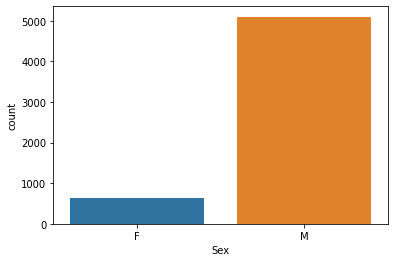

In [230]:
# Now we have divided Sex into F and M we are able to study the database.
sns.countplot(x=attacks_cp.Sex);

In [231]:
#List unique values in column Age.
attacks_cp.Age.unique()


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [232]:
# Using regular expressions to format our strings and get the ages in the form of \d+
attacks_cp.Age = attacks_cp.Age.str.replace(r'(^.*ee.*$)' , '16') # Teens, teenager... to 16
attacks_cp.Age = attacks_cp.Age.str.replace(r'(^.*oun.*$)' , '21') # Young... to 21
attacks_cp.Age = attacks_cp.Age.str.replace(r'(^.*dul.*$)' , '50') # Adults to 50
attacks_cp.Age = attacks_cp.Age.str.replace(r'(^.*lder.*$)', '90') #Elderly to 90
attacks_cp.Age = attacks_cp.Age.str.replace(r'(^.*mont.*$)', '1') # Months to 1 year 
attacks_cp.Age = attacks_cp.Age.str.replace(r'(.*)s.*', r'\1') 
attacks_cp.Age = attacks_cp.Age.str.replace(r'(\d?\d).+&.+\d\d', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'(\d?\d).or.\d?\d', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'(\d?\d).to.\d\d', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'mid-(\d\d)', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'(\d)½', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'(\d?\d)\?', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'"[a-z]+-[a-z]+"', '47')
attacks_cp.Age = attacks_cp.Age.str.replace(r'>(\d\d)', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'(\d\d?)\s+&\s+\?', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'\?\s+&\s+(\d\d?)', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace(r'\s?(\d\d?)\s?', r'\1')
attacks_cp.Age = attacks_cp.Age.str.replace("(\d)+'", r'\1')
attacks_cp.Age.str.split(',')
attacks_cp.Age.replace(('\xa0 ', 'NaN'), inplace = True)
attacks_cp.Age.replace(('MAKE LINE GREEN', 'NaN'), inplace = True)
attacks_cp.Age.replace(('A.M.', 'NaN'), inplace = True)
attacks_cp.Age.replace(('X', 'NaN'), inplace = True)
attacks_cp.Age.replace(('F', 'NaN'), inplace = True)
attacks_cp.Age.replace((' ', 'NaN'), inplace = True)
attacks_cp.Age.replace(('  ', 'NaN'), inplace = True)
attacks_cp.Age.replace(('Ca.33', 'NaN'), inplace = True)
attacks_cp.Age.replace(('Both11', 'NaN'), inplace = True)
attacks_cp.Age.replace(('37,67,35,27,27', '38'), inplace = True)
attacks_cp.Age.replace(('21,34,24', '26'), inplace = True)
attacks_cp.Age.replace(('28,23', '20'), inplace = True)
attacks_cp.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '55', '35', '46', '45', '14', '40', '28', '24', '49', '22',
       '7', '31', '17', '13', '42', '3', '8', '50', '16', '82', '73',
       '68', '51', '39', '58', '47', '61', '65', '36', '66', '43', '9',
       '72', '59', '6', '27', '64', '23', '71', '44', '62', '63', '70',
       '1', '53', '77', '74', '5', '86', '84', '75', '0', '87', '67',
       '90', '81', '78', '2'], dtype=object)

In [233]:
# Visualize column
attacks_cp.Age.describe()

count     3356
unique      80
top         18
freq       166
Name: Age, dtype: object

In [312]:
# Save ages as floats to be able to extract core statistics. And histplot the age divided by Sex.
attacks_cp.Age = pd.to_numeric(attacks_cp.Age)
print('Age mean: ', attacks_cp.Age.mean())
print('Age median: ', attacks_cp.Age.median() )
print('Age mode: ', attacks_cp.Age.mode())



Age mean:  27.45828367103695
Age median:  24.0
Age mode:  0    18.0
dtype: float64


In [247]:
# Start with Time statistics
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(attacks_cp.Date)
    

ID
1      2018-06-01
2      2018-06-01
3      2018-06-01
4      2018-06-01
5      2018-06-01
6      2018-06-01
7      2018-06-01
8      2018-05-01
9      2018-05-01
10     2018-05-01
11     2018-05-01
12     2018-05-01
13     2018-05-01
14     2018-05-01
15     2018-05-01
16     2018-05-01
17     2018-05-01
18     2018-04-01
19     2018-04-01
20     2018-04-01
21     2018-04-01
22     2018-04-01
23     2018-04-01
24     2018-04-01
25     2018-04-01
26     2018-04-01
27     2018-04-01
28     2018-04-01
29     2018-04-01
30     2018-04-01
31     2018-04-01
32     2018-04-01
33     2018-04-01
34     2018-04-01
35     2018-04-01
36     2018-03-01
37     2018-03-01
38     2018-03-01
39     2018-03-01
40     2018-02-01
41     2018-02-01
42     2018-02-01
43     2018-02-01
44     2018-02-01
45     2018-02-01
46     2018-02-01
47     2018-02-01
48     2018-01-01
49     2018-01-01
50     2018-01-01
51     2018-01-01
52     2018-01-01
53     2018-01-01
54     2017-12-01
55     2017-12-01
56     

In [244]:
# Eliminate 'Reported', and also the day, of the month.
attacks_cp.Date = attacks_cp.Date.str.replace(r'\w+.\d+-+(\w+-+\d+)', r'\1')
attacks_cp.Date = attacks_cp.Date.str.replace(r'\w+.\d+-+(\w+-+\d+)', r'\1')
attacks_cp.Date = attacks_cp.Date.str.replace(r'\d+-(\w+-\d+)', r'\1')

In [246]:
# Finally transform date type to timestamp and errors setted as Nan.
attacks_cp.Date = pd.to_datetime(attacks_cp.Date, errors ='coerce')                                            

In [274]:
# Space statistics by country
# List unique values for countries
attacks_cp.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [275]:
# list countries sorted by the number of attacks.
attacks_cp.Country.value_counts()

USA                                      2229
AUSTRALIA                                1338
SOUTH AFRICA                              579
PAPUA NEW GUINEA                          134
NEW ZEALAND                               128
BRAZIL                                    112
BAHAMAS                                   109
MEXICO                                     89
ITALY                                      71
FIJI                                       62
PHILIPPINES                                61
REUNION                                    60
NEW CALEDONIA                              53
CUBA                                       46
MOZAMBIQUE                                 45
SPAIN                                      44
INDIA                                      40
EGYPT                                      38
JAPAN                                      34
CROATIA                                    34
PANAMA                                     32
SOLOMON ISLANDS                   

In [310]:
# Export dataframe to work with it in the analysis section.
attacks_cp.to_csv(path_or_buf= '/Users/pabloariza/documents/ironhack/pandas-project/your-code/attacks_cp.csv')

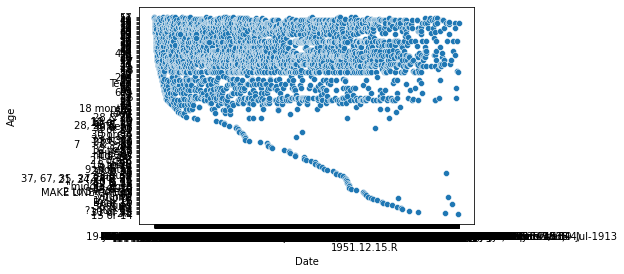

In [313]:
sns.scatterplot(x=attacks.Date,
               y= attacks.Age);